In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

In [5]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [11]:
def curve(x, noise=False):
    rand_sig = np.random.RandomState(1)
    rand_noise = np.random.RandomState(0)
    if noise == False:
        return np.sin(2*x*np.pi)
    else:
        return 0.2*np.sign(0.5-rand_sig.rand(x.shape[0]))*rand_noise.rand(x.shape[0]) + np.sin(2*x*np.pi)

def plot():
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x_curve, y_curve, '--', linewidth=2, label="ground truth")
    ax.scatter(x_train, y_train, label="training")
    ax.scatter(x_test, y_test, label="test")
    ax.set_title('Curve Fitting')
    ax.legend()

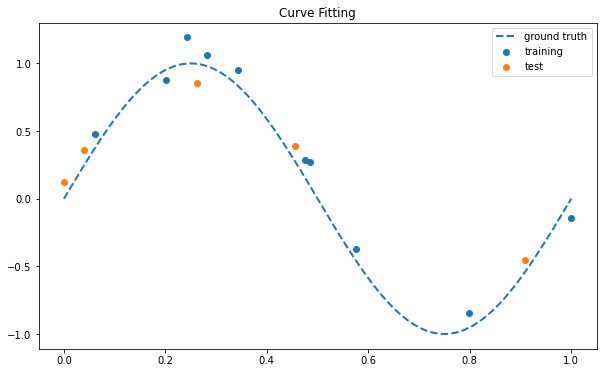

In [177]:
num_points_curve = 100
size_train = 10
size_test = 5

x_curve = np.linspace(0, 1, num_points_curve)
y_curve = curve(x_curve)

x_train, x_test = train_test_split(x_curve, random_state=42)

rng = np.random.RandomState(3)
x_train = rng.choice(x_train, size=size_train, replace=False)
x_test = rng.choice(x_test, size=size_test, replace=False)

y_train = curve(x_train, noise=True)
y_test = curve(x_test, noise=True)

figsize=[10,6]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x_curve, y_curve, '--', linewidth=2, label="ground truth")
ax.scatter(x_train, y_train, label="training")
ax.scatter(x_test, y_test, label="test")
ax.set_title('Curve Fitting')
ax.legend()

In [178]:
from sklearn.linear_model import LinearRegression

In [199]:
## approximated function
degree = 3
x_train_features = PolynomialFeatures(degree=degree).fit_transform(np.array(x_train).reshape(-1, 1))
x_train_features.shape

(10, 4)

In [200]:
lr = LinearRegression().fit(x_train_features, y_train.reshape(-1, 1))

In [201]:
y_train_pred = lr.predict(x_train_features)
# y_train_pred = lr.predict(x_train_features)

x_curve_features = PolynomialFeatures(degree=degree).fit_transform(x_curve.reshape(-1, 1))
y_curve_pred = lr.predict(x_curve_features)

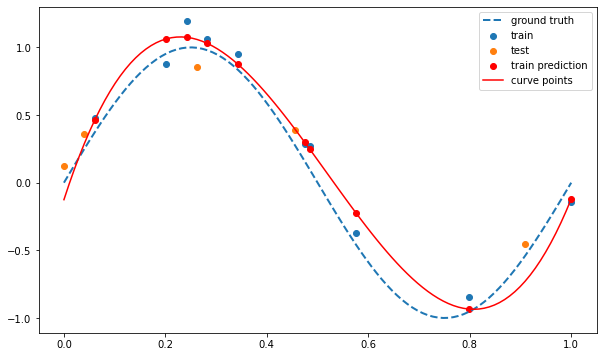

In [202]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(x_curve, y_curve, '--', linewidth=2, label="ground truth")
ax.scatter(x_train, y_train, label="train")
ax.scatter(x_test, y_test, label="test")
ax.scatter(x_train, y_train_pred, label="train prediction", color='red')
ax.plot(x_curve, y_curve_pred, label="curve points", color='red')
ax.legend()

In [146]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [147]:
lr.coef_

array([[   0.        ,   -4.94738439,   74.21111589, -252.45672364,
         299.38613601, -116.8931695 ]])

In [203]:
from sklearn.metrics import mean_squared_error

In [204]:
### Simulation
list_metrics = []
list_coeff = []

num_points_curve = 100
size_train = 10
size_test = 5
degree = 3

x_curve = np.linspace(0, 1, num_points_curve)
y_curve = curve(x_curve)

for i in range(50):
   

    x_train, x_test = train_test_split(x_curve)#, random_state=42)

    rng = np.random.RandomState(3)
    x_train = rng.choice(x_train, size=size_train, replace=False)
    x_test = rng.choice(x_test, size=size_test, replace=False)

#     y_train = curve(x_train, noise=True)
#     y_test = curve(x_test, noise=True)

    ## approximated function
    x_train_features = PolynomialFeatures(degree=degree).fit_transform(np.array(x_train).reshape(-1, 1))
    x_test_features = PolynomialFeatures(degree=degree).fit_transform(np.array(x_test).reshape(-1, 1))
    
    lr = LinearRegression().fit(x_train_features, y_train.reshape(-1, 1))
    
    y_train_pred = lr.predict(x_train_features)
    y_test_pred = lr.predict(x_test_features)

#     x_curve_features = PolynomialFeatures(degree=degree).fit_transform(x_curve.reshape(-1, 1))
#     y_curve_pred = lr.predict(x_curve_features)
    
    list_metrics.append([mean_squared_error(y_train, y_train_pred),
                         mean_squared_error(y_test, y_test_pred)])
    
    list_coeff.append(lr.coef_)


In [205]:
def boxhist(df, column, figsize=(10,5)):
    variable = df[column].values 
    f, (ax_box, ax_hist) = plt.subplots(2, figsize=figsize, sharex=True, gridspec_kw= {"height_ratios": (1.0, 2)})
    mean=np.mean(variable)
    median=np.median(variable)
    
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.set_title(column)
    
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    
    plt.title(column, fontsize=10, loc="center")
    #plt.legend({'Mean':mean,'Median':median})
    #plt.legend('Mean')
    ax_box.set(xlabel='')
    plt.show()

/home/jaime/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jaime/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


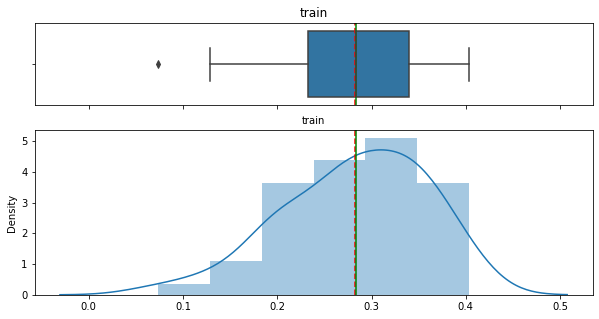

In [206]:
df_metrics = pd.DataFrame(np.array(list_metrics))
df_metrics.columns = ['train', 'test']
boxhist(df_metrics, 'train', figsize=(10,5))

/home/jaime/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jaime/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


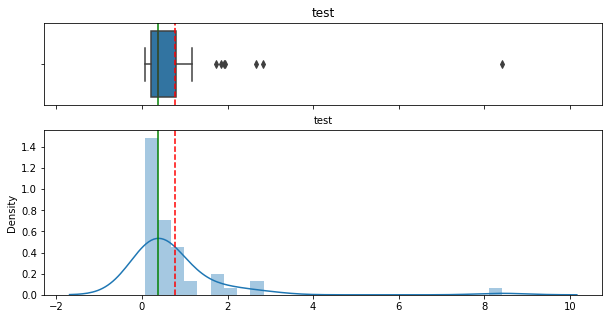

In [207]:
boxhist(df_metrics, 'test', figsize=(10,5))

In [208]:
df_metrics.describe()

,train,test
count,50.000000,50.000000
mean,0.282220,0.776275
std,0.076072,1.276937
min,0.073839,0.058921
25%,0.233151,0.202640
50%,0.283060,0.383229
75%,0.339342,0.794479
max,0.403237,8.413207


In [209]:
pd.DataFrame(np.vstack(list_coeff)).describe()

,0,1,2,3
count,50.0,50.000000,50.000000,50.000000
mean,0.0,-3.714937,6.453266,-3.527435
std,0.0,14.609183,29.793613,18.459328
min,0.0,-52.835603,-43.270844,-75.941844
25%,0.0,-8.590079,-13.521721,-9.517677
50%,0.0,0.105167,-0.202598,1.585285
75%,0.0,5.652281,18.183205,6.633451
max,0.0,20.556861,115.773955,26.316658


In [175]:
df_metrics.describe()

,train,test
count,50.000000,50.000000
mean,0.211354,90.982482
std,0.091522,386.851485
min,0.039360,0.087969
25%,0.133271,0.362365
50%,0.197416,0.717697
75%,0.300911,2.030103
max,0.357296,2195.996656


In [176]:
pd.DataFrame(np.vstack(list_coeff)).describe()

,0,1,2,3,4,5
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,-62.276686,240.337728,-425.470393,352.166837,-111.158294
std,0.0,291.882177,1275.376360,2695.221252,2719.511394,1048.330841
min,0.0,-1325.378736,-2626.940703,-11582.505859,-6404.206556,-5205.615688
25%,0.0,-79.795014,-194.754536,-1054.891297,-580.224651,-388.635157
50%,0.0,-0.863770,12.568952,-88.976996,-43.936996,28.045770
75%,0.0,32.653462,476.592571,466.708656,1065.755170,251.729836
max,0.0,574.889869,4612.585563,6037.892513,12789.092234,2508.104296


In [29]:
# x, y = make_regression(
#     n_samples = 500,
#     n_features=1,
#     n_informative=10,
#     bias=0.5,        
#     random_state=42,
# )
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
# print("size, train/test: ", x_train.shape,'/',x_test.shape)